# Twitter Sentiment Analysis For Apple and Google Products

## Business Understanding ### 
The purpose of this study is to assess consumer sentiment towards Apple and Android in tweets on the legacy Twitter platform usign crowdsourced sentiment analysis. Our objective is to discover actionable findings by examining whether a tweet expresses a positive, negative, or neutral sentiment and identifying the target brand when emotion is evoked. By gaining a deep insight into the public mood dynamics around these top brands, stakeholders will be able to optimize product line extensions, promotional campaigns, and competitive placement.

The company can more effectively handle consumer sentiment, customize brand messages, and pro-actively react to shifts in the market using transforming raw emotional responses from tweets into systematic analytcs.



### Objectives
1. **Data Preprocessing and Cleaning**  
   - Removal of noise from raw tweet texts by cleaning and normalizing the data (e.g., misspellings, stop‑word removal, tokenization).
   - Cleaning the sentiment‑analysis dataset so that all tweets share the same format.

2. **Sentiment Classification Development**  
   - Developing and training a sentiment‑analysis model that can assign positive, negative, or neutral sentiment to each tweet.  
   - Validating the model on a held‑out sample of tweets to ensure accuracy and robustness.

3. **Target Brand Identification**  
   - Using NLP techniques to accurately extract and tag target brands within tweets so that sentiment is allocated correctly to “Apple” or “Android.”
   -  Addressing entity‑recognition challenges, such as brand mentions embedded in user‑generated sentences or hashtags.

4. **Performance Evaluation and Optimization**  
   - Tracking of key metrics (accuracy, precision, recall, F1‑score) to measure model effectiveness.  
   - Iteration on both model architecture and preprocessing pipeline based on performance feedback.

5. **Visualization and Reporting**  
   - Creation of dashboards and visualizations to communicate sentiment trends, comparative brand analyses, and key insights.
   - Provide written reports with clear, actionable recommendations for stakeholders.

6. **Actionable Business Insights**  
   - Translating analytical findings into strategic recommendations for marketing, product development, and competitive positioning.
   -  Ensuring insights drive decision‑making and future strategy.


#### Data Understanding

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding ='latin1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
print ("Dataset shape:", data.shape)

Dataset shape: (9093, 3)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


*Seems like the 'emotion in tweet is directed at' column has roughly 64% of missing values*

In [5]:
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


*Since we have over 60% of missing values in the ' emotion is directed at' column, we will assume the sentiments were directed toward any specific brand and fill the missing data with 'None'.*

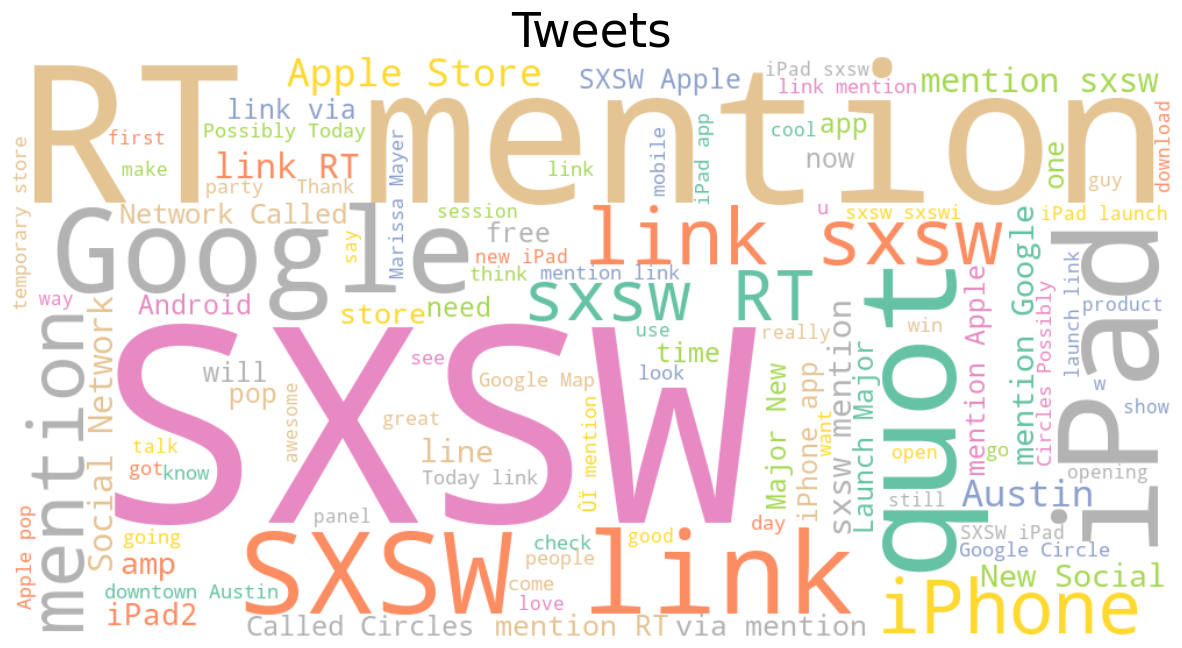

In [6]:
# generating the word cloud with text data
from wordcloud import WordCloud
tweet = " ".join(data["tweet_text"].astype(str))
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      colormap='Set2',
                      max_words=100).generate(tweet)

# plotting
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tweets', fontsize=34)
plt.show()

In [7]:
data['emotion_in_tweet_is_directed_at'] = data['emotion_in_tweet_is_directed_at'].fillna('None')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     9093 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
data = data.dropna(subset=['tweet_text'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     9092 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


#### ***Cleaning the Text data***

In [9]:
#creating a function for the cleaning to prevent data leaks
def preprocess_text(text):
    text = text.lower()
    tokenizer = RegexpTokenizer(r'\#\w+|\@\w+|[\w\']+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens

In [10]:
data = data.copy()
data.loc[:, 'cleaned_text'] = data['tweet_text'].apply(preprocess_text)
print(data[['tweet_text', 'cleaned_text']].head())

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  
0  [iphone, hr, tweeting, dead, need, upgrade, pl...  
1  [know, awesome, ipad, app, likely, appreciate,...  
2                                 [wait, also, sale]  
3              [hope, festival, crashy, iphone, app]  
4  [great, stuff, fri, marissa, mayer, tim, book,...  


In [11]:
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, dead, need, upgrade, pl..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, app, likely, appreciate,..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]"
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, tim, book,..."


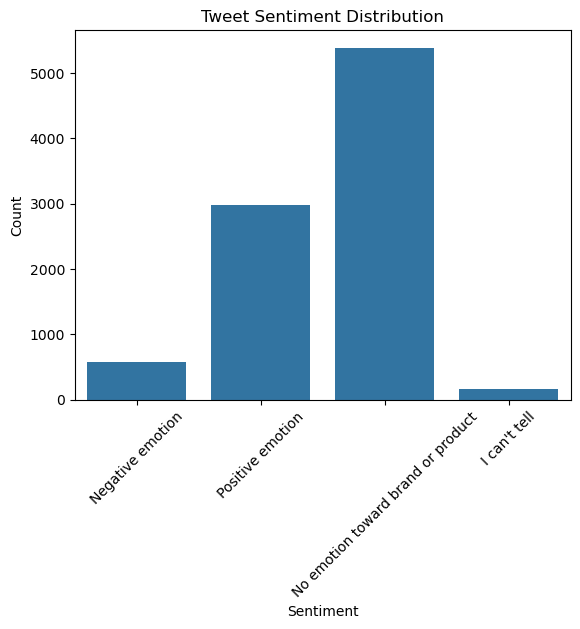

In [12]:
import seaborn as sns
sns.countplot(data=data, x='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Tweet Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

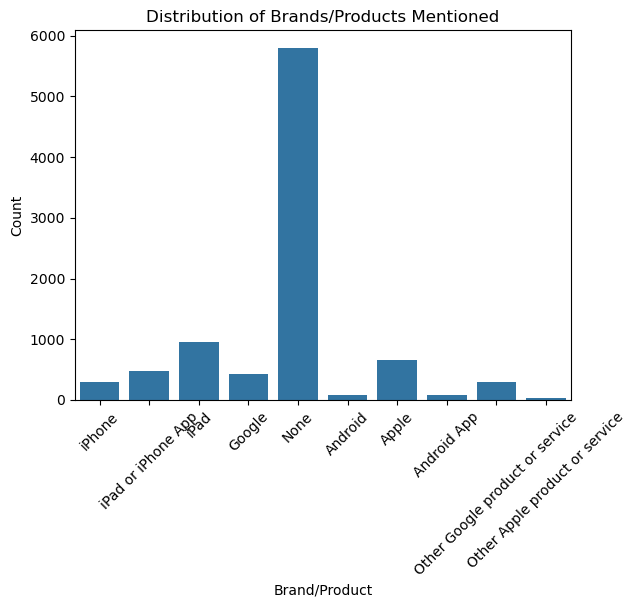

In [13]:
sns.countplot(data=data, x='emotion_in_tweet_is_directed_at')
plt.title('Distribution of Brands/Products Mentioned')
plt.xlabel('Brand/Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

*We have now stripped down the tweet text into smaller units(tokens). We can therefore vectorize the cleaned text which is a numerical representation of the tokens to capture the semantic meanings and relationship between words.*

In [14]:
#count vectorization
data['cleaned_text_str'] = data['cleaned_text'].apply(lambda tokens: " ".join(tokens)
                                                   if isinstance(tokens, list) else tokens)
print (data.head())
vectorizer = CountVectorizer()
# Determining our X and y variables
X = vectorizer.fit_transform(data['cleaned_text_str'])
# Retrieving the vocabulary (unique tokens)
vocabulary = vectorizer.get_feature_names_out()
print("Vocabulary:", vocabulary)

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  \
0                                   Negative emotion   
1                                   Positive emotion   
2                                   Positive emotion   
3                                   Negative emotion   
4                                   Positive emotion   

                                        cleaned_text  \
0  [iphone, hr, tweeting, dead, need, upgrade, 

In [15]:
#converting the count vectors into termfrequency-inverse density functions to weigh up the words used
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X)
print(X_tfidf)

  (0, 1552)	0.3684616088863313
  (0, 3003)	0.4244896647641578
  (0, 3269)	0.15142989609787644
  (0, 4125)	0.23875345692912758
  (0, 4662)	0.43378786985174894
  (0, 5903)	0.38505780449010707
  (0, 6483)	0.34970803700202213
  (0, 6600)	0.3812783768907172
  (1, 180)	0.3291693108478935
  (1, 270)	0.19821530745597185
  (1, 287)	0.47364997532014275
  (1, 444)	0.30085442852133065
  (1, 1638)	0.2999511533598006
  (1, 2466)	0.2450971358332627
  (1, 2627)	0.3322460136625001
  (1, 3263)	0.13963002554223836
  (1, 3459)	0.2767289428176678
  (1, 3610)	0.42543437165832454
  (2, 180)	0.5606723380034568
  (2, 5342)	0.6093382137987695
  (2, 6735)	0.5606723380034568
  (3, 270)	0.2570766512843946
  (3, 1406)	0.6654601478346531
  (3, 2292)	0.48848709038737603
  (3, 2972)	0.45214060341718654
  :	:
  (9089, 2262)	0.2971439304952386
  (9089, 4145)	0.20599065881553477
  (9089, 4315)	0.2971439304952386
  (9089, 4584)	0.5687136620625677
  (9089, 4727)	0.24063744919675428
  (9089, 5127)	0.28435683103128384
  (908

In [16]:
X_tfidf_dense = X_tfidf.toarray()
def print_top_features(document_index, top_n=10):
    scores = X_tfidf_dense[document_index]
    
    feature_scores = [(vocabulary[i], scores[i]) for i in range(len(vocabulary))]
    
    feature_scores.sort(key=lambda x: x[1], reverse=True)
    
    
    print(f"Top {top_n} features for document {document_index}:")
    for term, score in feature_scores[:top_n]:
        print(f"{term}: {score:.4f}")
    print()


for i in range(min(5, X_tfidf.shape[0])):  
    print_top_features(i)

df = pd.DataFrame(X_tfidf_dense, columns=vocabulary)
print(df.head())  

Top 10 features for document 0:
plugin: 0.4338
hr: 0.4245
station: 0.3851
upgrade: 0.3813
dead: 0.3685
tweeting: 0.3497
need: 0.2388
iphone: 0.1514
aapl: 0.0000
aaron: 0.0000

Top 10 features for document 1:
appreciate: 0.4736
likely: 0.4254
giving: 0.3322
also: 0.3292
awesome: 0.3009
design: 0.3000
know: 0.2767
free: 0.2451
app: 0.1982
ipad: 0.1396

Top 10 features for document 2:
sale: 0.6093
also: 0.5607
wait: 0.5607
aapl: 0.0000
aaron: 0.0000
ab: 0.0000
abacus: 0.0000
abandoned: 0.0000
abba: 0.0000
aber: 0.0000

Top 10 features for document 3:
crashy: 0.6655
festival: 0.4885
hope: 0.4521
app: 0.2571
iphone: 0.2191
aapl: 0.0000
aaron: 0.0000
ab: 0.0000
abacus: 0.0000
abandoned: 0.0000

Top 10 features for document 4:
mullenweg: 0.4450
fri: 0.3966
matt: 0.3809
tim: 0.3514
stuff: 0.3238
book: 0.3197
marissa: 0.2411
mayer: 0.2368
great: 0.2344
aapl: 0.0000

   aapl  aaron   ab  abacus  abandoned  abba  aber  ability  able  abnormal  \
0   0.0    0.0  0.0     0.0        0.0   0.0   0.0 

*From the tfidf analysis it is evident that apple products appear in 2 of the four documents. This a clear indication that apple seems to have more gravity than google whatever the case i.e. positive, negative or neutral sentiments.The term frequency-inverse document function quantifies word importance for a variety of text but it rarely gives us the sentiment score of words. We therefore have to use other methods for analysis* 

#### Sentiment Analysis

In [17]:
pip install xlwt

In [18]:
df.to_csv('output.csv', index=False)

In [19]:
df.to_excel('output.xlsx', index=False)

In [20]:
data.to_excel('output2.xlsx', index = False)

In [21]:
#initializing sentiment analyzer
sent = SentimentIntensityAnalyzer()

In [22]:
def get_sentiment_scores(text):
    if isinstance(text, list):
        text = ' '.join(text)
    
    return sent.polarity_scores(text)
def get_sentiment_label(scores):
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [23]:
# Apply sentiment analysis with the fixed function
data['sentiment_scores'] = data['cleaned_text'].apply(get_sentiment_scores)

In [24]:
# Extract the compound score if you want it separately
data['compound_score'] = data['sentiment_scores'].apply(lambda x: x['compound'])

In [25]:
 #Apply sentiment labeling
data['sentiment_label'] = data['sentiment_scores'].apply(get_sentiment_label)

# Display the results
print(data[['tweet_text', 'cleaned_text', 'compound_score', 'sentiment_label']].head())
data.head()

                                          tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

                                        cleaned_text  compound_score  \
0  [iphone, hr, tweeting, dead, need, upgrade, pl...         -0.6486   
1  [know, awesome, ipad, app, likely, appreciate,...          0.9100   
2                                 [wait, also, sale]          0.0000   
3              [hope, festival, crashy, iphone, app]          0.7269   
4  [great, stuff, fri, marissa, mayer, tim, book,...          0.6249   

  sentiment_label  
0        negative  
1        positive  
2         neutral  
3        positive  
4        positive  


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,cleaned_text,cleaned_text_str,sentiment_scores,compound_score,sentiment_label
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,"[iphone, hr, tweeting, dead, need, upgrade, pl...",iphone hr tweeting dead need upgrade plugin st...,"{'neg': 0.381, 'neu': 0.619, 'pos': 0.0, 'comp...",-0.6486,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,"[know, awesome, ipad, app, likely, appreciate,...",know awesome ipad app likely appreciate design...,"{'neg': 0.0, 'neu': 0.324, 'pos': 0.676, 'comp...",0.9100,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,"[wait, also, sale]",wait also sale,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,"[hope, festival, crashy, iphone, app]",hope festival crashy iphone app,"{'neg': 0.0, 'neu': 0.33, 'pos': 0.67, 'compou...",0.7269,positive
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,"[great, stuff, fri, marissa, mayer, tim, book,...",great stuff fri marissa mayer tim book matt mu...,"{'neg': 0.0, 'neu': 0.661, 'pos': 0.339, 'comp...",0.6249,positive


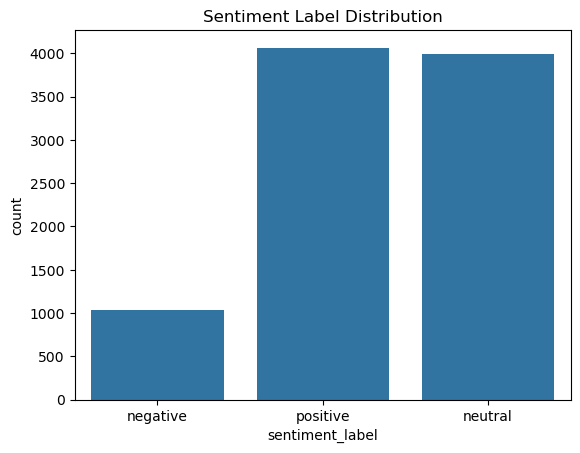

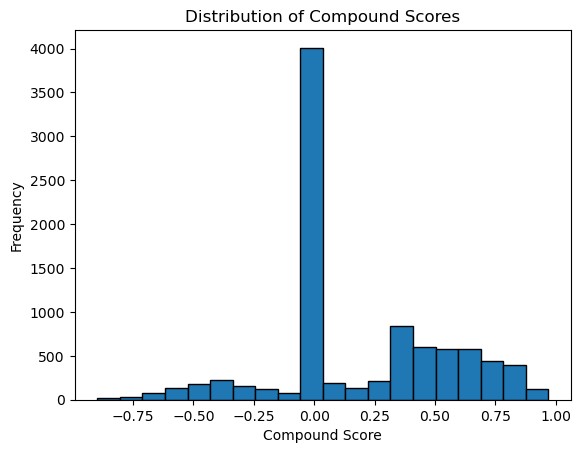

In [26]:
sns.countplot(x='sentiment_label', data=data)
plt.title("Sentiment Label Distribution")
plt.show()

# Histogram of compound scores
plt.hist(data['compound_score'], bins=20, edgecolor='k')
plt.title("Distribution of Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

#### Logistic regression model

In [27]:
#Splitting the data into training and testing data to an algorithm
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
y = data['sentiment_label']
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.96      0.33      0.50       326
     neutral       0.79      0.90      0.84      1182
    positive       0.85      0.88      0.86      1220

    accuracy                           0.82      2728
   macro avg       0.87      0.70      0.73      2728
weighted avg       0.84      0.82      0.81      2728



*The logistic regression model corectly predicts the negative class 96% of the time but only has a recall of 33%. This means the model only captures 33% of the actual negative sentiment class. F1-score of 50% indicates clear imbalance this could be due to the under-representation of this class with only 326 instances. When the neutral and positive classes were predicted the model could accurately predict 79% & 85% ,respectively, correctly. The model could also capture 88% of real positive and 90% of real neutral sentiments*

#### Random Forest

In [28]:
param_grid = {
    "criterion":["gini","entropy"],
    "max_depth":[None,5,10,15],
    "min_samples_split":[2,10],
    "min_samples_leaf":[1,4,8]
}

In [29]:
forest = RandomForestClassifier(
    n_estimators=200,
    criterion='gini',
    max_depth=20,
    random_state=42,
    n_jobs=-3
)
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',   
    n_jobs=-1
)
grid_search.fit(X_train,y_train)


y_pred = grid_search.predict(X_test)
print(metrics.classification_report(y_test, y_pred))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.96      0.41      0.58       326
     neutral       0.76      0.98      0.86      1182
    positive       0.94      0.83      0.88      1220

    accuracy                           0.84      2728
   macro avg       0.89      0.74      0.77      2728
weighted avg       0.87      0.84      0.84      2728

Accuracy: 0.844208211143695


*The negative class still has a high precision score of 96%, the recall however is still low (41%) this could be due the low number of instances (326. The precision in the neutral class is slightly lower as compared to the logistic algorithm.*

#### Bagging Classifier

In [30]:
bag = BaggingClassifier(
    estimator=DecisionTreeClassifier(
        criterion='gini',
        random_state=42
    ),
    n_estimators=100,     
    max_samples=1.0,      
    max_features=1.0,     
    n_jobs=-1,          
    random_state=123
)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

print("\nBaggingClassifier (DecisionTree, Gini) results:")
print(metrics.classification_report(y_test, y_pred_bag))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_bag))


BaggingClassifier (DecisionTree, Gini) results:
              precision    recall  f1-score   support

    negative       0.92      0.46      0.62       326
     neutral       0.78      0.98      0.87      1182
    positive       0.95      0.84      0.89      1220

    accuracy                           0.86      2728
   macro avg       0.88      0.76      0.79      2728
weighted avg       0.87      0.86      0.85      2728

Accuracy: 0.8559384164222874


#### Neural Network

In [31]:
#importing the neceessary libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Dense, Dropout, Flatten, LSTM,GlobalAveragePooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# Step 1: Load and prepare the dataset
def create_sample_df(data):
    df_sample = pd.DataFrame(data)
    return df_sample
def prepare_data_for_model(data):
    # Create a vocabulary from all words in cleaned_text
    all_words = []
    max_sequence_length = 0
    
    for text in data['cleaned_text']:
        all_words.extend(text)
        max_sequence_length = max(max_sequence_length, len(text))
    
    # Create a word-to-index mapping
    word_to_idx = {word: idx + 1 for idx, word in enumerate(set(all_words))}
    
    # Add padding token
    word_to_idx['<PAD>'] = 0
    
    # Convert tokenized texts to sequences of indices
    sequences = []
    for text in data['cleaned_text']:
        seq = [word_to_idx.get(word, 0) for word in text]  # Use 0 for unknown words
        sequences.append(seq)
    
    # Pad sequences to ensure uniform length
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')
    
    # Encode sentiment labels
    label_encoder = LabelEncoder()
    encoded_labels = label_encoder.fit_transform(data['sentiment_label'])
    
    # If you have 3 sentiment classes (positive, negative, neutral), convert to categorical
    num_classes = len(label_encoder.classes_)
    if num_classes > 2:
        encoded_labels = to_categorical(encoded_labels)
    
    return padded_sequences, encoded_labels, word_to_idx, max_sequence_length, label_encoder, num_classes


In [33]:

# Step 2: Build the model
def build_sentiment_model(vocab_size, embedding_dim, max_sequence_length, num_classes):
    """
    Build a neural network model for sentiment analysis.
    Customize based on the complexity of your dataset.
    """
    model = Sequential()
    
    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, 
                        output_dim=embedding_dim, 
                        input_length=max_sequence_length))
    
    # Option 1: Simple feedforward approach
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    
    # Option 2: LSTM approach (commented out)
     #Uncomment this and comment out the Flatten and first Dense layer above for LSTM
     #model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    
    # Output layer
    if num_classes > 2:
        # Multi-class classification with softmax
        model.add(Dense(num_classes, activation='softmax'))
        loss_function = 'categorical_crossentropy'
    else:
        # Binary classification with sigmoid
        model.add(Dense(1, activation='sigmoid'))
        loss_function = 'binary_crossentropy'
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss=loss_function,
                  metrics=['accuracy'])
    
    return model

In [34]:

# Step 3: Train and evaluate
def train_evaluate_model(model, X_train, y_train, X_test, y_test, epochs=40, batch_size=32):
    """Train the model and evaluate its performance."""
    # Early stopping to prevent overfitting
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True
    )
    
    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.3,  # 20% of training data for validation
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Evaluate the model on test data
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    
    return history


In [35]:

# Step 4: Plot training history
def plot_training_history(history):
    """Plot the training and validation accuracy/loss."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot accuracy
    ax1.plot(history.history['accuracy'])
    ax1.plot(history.history['val_accuracy'])
    ax1.set_title('Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='upper left')
    
    plt.tight_layout()
    plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5218 - loss: 0.9501 - val_accuracy: 0.7333 - val_loss: 0.6817
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8068 - loss: 0.5186 - val_accuracy: 0.8245 - val_loss: 0.4795
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9552 - loss: 0.1841 - val_accuracy: 0.8552 - val_loss: 0.4455
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9904 - loss: 0.0510 - val_accuracy: 0.8451 - val_loss: 0.5034
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9950 - loss: 0.0220 - val_accuracy: 0.8506 - val_loss: 0.5159
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9994 - loss: 0.0093 - val_accuracy: 0.8497 - val_loss: 0.5512
Test Loss: 0.4667
Test Accuracy: 0.8373


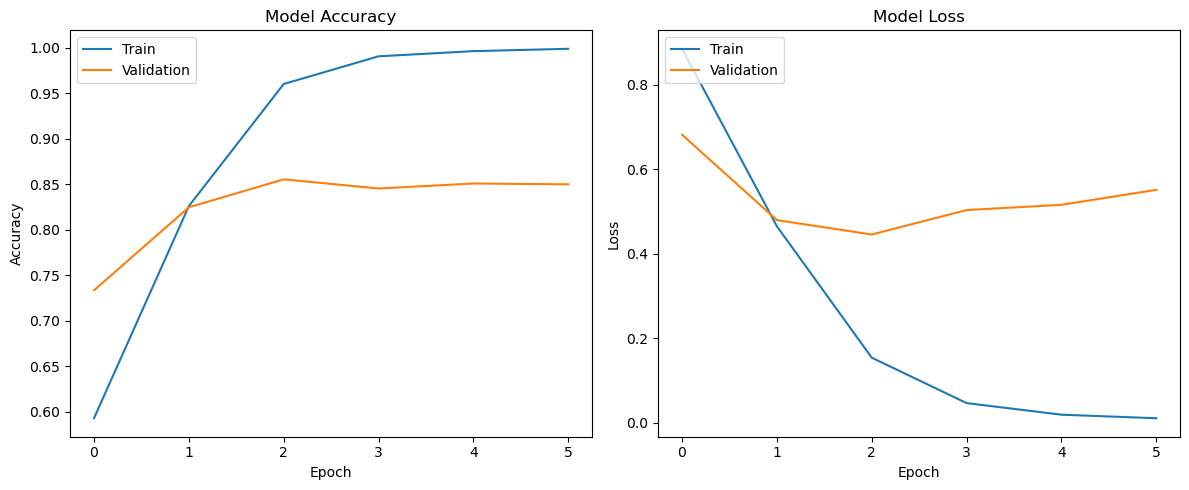

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Sample text: love product great quality iphone
Predicted sentiment: positive (Confidence: 0.9998)


In [36]:
#Step 5: Prediction function
def predict_sentiment(model, text, word_to_idx, max_sequence_length, label_encoder):
    """Predict sentiment for new text."""
    # Assuming text is already cleaned and tokenized like your input data
    # Convert to sequence
    sequence = [word_to_idx.get(word, 0) for word in text]  # Use 0 for unknown words
    # Pad the sequence
    padded_sequence = pad_sequences([sequence], maxlen=max_sequence_length, padding='post')
    
    # Make prediction
    prediction = model.predict(padded_sequence)[0]
    
    # Interpret prediction based on model type
    if isinstance(prediction, (list, np.ndarray)) and len(prediction) > 1:
        # Multi-class case
        predicted_class_index = np.argmax(prediction)
        confidence = prediction[predicted_class_index]
    else:
        # Binary case
        predicted_class_index = 1 if prediction >= 0.5 else 0
        confidence = prediction if prediction >= 0.5 else 1 - prediction
    
    predicted_sentiment = label_encoder.inverse_transform([predicted_class_index])[0]
    
    return predicted_sentiment, confidence

# Main execution
def main():
    # Load data (or use our sample for demonstration)
    data_n = create_sample_df(data)
    
    # Prepare data
    X, y, word_to_idx, max_sequence_length, label_encoder, num_classes = prepare_data_for_model(data)
    
    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Build model
    vocab_size = len(word_to_idx)
    embedding_dim = 50  # Can be tuned
    model = build_sentiment_model(vocab_size, embedding_dim, max_sequence_length, num_classes)
    print(model.summary())
    
    # Train and evaluate
    history = train_evaluate_model(model, X_train, y_train, X_test, y_test)
    
    # Plot training history
    plot_training_history(history)
    
    # Example prediction
    sample_text = ["love", "product", "great", "quality","iphone"]
    sentiment, confidence = predict_sentiment(
        model, sample_text, word_to_idx, max_sequence_length, label_encoder
    )
    print(f"Sample text: {' '.join(sample_text)}")
    print(f"Predicted sentiment: {sentiment} (Confidence: {confidence:.4f})")
    
    # Save the model if needed
    # model.save('sentiment_model.h5')

if __name__ == "__main__":
    main()

*The neural network model's training accuracy (blue line) starts low at 60% and steadily improves to nearly 100% while the validation accuracy (orange line) starts at 74% and improves more slowly, stabilizing around 85% where it plateaus.With almost 100% training accuracy and almost zero training loss, the neural network is successfully learning the training data.The model's capacity to generalize is not getting better after a certain point (about epoch 2), as evidenced by the plateau in validation accuracy and the little increase and stabilization of validation loss. This frequently indicates the well-known issue of overfitting, in which the model begins to "memorize" the training data instead of picking up patterns that are good for generalization. The training loss (blue line), however, starts high and continuously decreases to nearly zero while the validation loss (orange line) initially decreases but then starts increasing after epoch 2.The growing gap between training and validation performance indicates overfitting - the model is memorizing training data but not generalizing well to new data.*

#### Conclusion
*The analysis reveals a significant issue with missing data, particularly in the column that identifies the emotional targets of tweets, where around 64% of the entries are absent. To address this challenge, missing values were substituted with 'None,' acknowledging that the sentiments expressed do not necessarily correspond to a specific brand. As a preliminary step for further analysis, the tweets were tokenized and vectorized, clarifying the semantic relationships among words. A TF-IDF analysis indicates that Apple devices are mentioned in two out of four documents, suggesting that Apple receives more attention than Google, whether positive or negative. It is important to recognize that TF-IDF measures the importance of words within a corpus rather than sentiment, necessitating the use of additional methods for accurate sentiment orientation assessment. During the modeling phase, logistic regression was utilized, achieving an impressive 96% accuracy in identifying negative sentiments; however, this is counterbalanced by a low recall rate of 33%, primarily due to the negative sentiment class being underrepresented with only 326 instances. This imbalance leads to a disparity in performance across sentiment classes, with the model performing significantly better on neutral and positive sentiments. Furthermore, a neural network model was trained, quickly attaining nearly perfect training accuracy of about 100% with minimal training loss. Despite this promising outcome, validation accuracy plateaued at approximately 85% after several epochs, while validation loss began to rise, indicating overfitting. This suggests that the model is too closely aligned with the training data, limiting its ability to generalize and recognize broader, transferable patterns in new datasets.*

#### Recommendations
 *Data Imbalance:  
  The model struggles to detect negative sentiment reliably due to a significant under-representation (only 326 instances). To improve recall for the negative class, consider oversampling the negatives, undersampling the majority classes, or generating synthetic samples using methods like SMOTE.*
  *Handling of Missing Emotional Target Data: 
  With about 64% of entries missing in the emotional target field, simply replacing missing values with "None" is insufficient. A more nuanced, multi-stage process is suggested—first identifying if a tweet targets any brand, then pinpointing the specific brand, and finally assessing the sentiment. This refined approach could yield deeper insights into brand-specific sentiment.*
*Combat Neural Network Overfitting:  
  The current neural network shows near-perfect performance on training data but plateaus on validation data, signaling overfitting. Integrate further regularization techniques (e.g., additional dropout layers, L1/L2 regularization) and early stopping to improve generalization on unseen data.*

 *Explore Ensemble Methods:  
  Merging the high precision of the logistic regression model (which, however, has low recall for negatives) with other algorithms that better capture negative sentiment could help balance the precision-recall trade-off. An ensemble approach may provide more robust and reliable sentiment classifications across all sentiment categories.*

*Conclusion:*  
*To enhance sentiment analysis performance, it is crucial to balance the dataset through sampling or synthetic data generation, adopt a multi-stage classification process for more refined brand and sentiment detection, and address overfitting in the neural network with stronger regularization measures and early stopping. Moreover, integrating ensemble methods that combine models with complementary strengths could further balance precision and recall, leading to a more reliable analysis across all sentiment classes.*